In [4]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [7]:
def load_df(csv_path='input/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df


In [9]:
train_df = load_df()
test_df = load_df('input/test.csv')

Loaded train.csv. Shape: (903653, 25)
Loaded test.csv. Shape: (804684, 24)


In [11]:
print(train_df.columns)
print(test_df.columns)

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device.device', 'geoNetwork.geoNetwork', 'totals.totals',
       'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.criteriaParameters',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.campaignCode', 'trafficSource.isTrueDirect',
       'trafficSource.keyword', 'trafficSource.medium',
       'trafficSource.referralPath', 'trafficSource.source'],
      dtype='object')
Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device.device', 'geoNetwork.geoNetwork', 'totals.totals',
       'trafficSou

In [12]:
train_df = train_df.sample(frac=0.1, random_state = 1)
print(train_df.shape)
print(train_df.describe())

(90365, 25)
               date       visitId   visitNumber  visitStartTime
count  9.036500e+04  9.036500e+04  90365.000000    9.036500e+04
mean   2.016589e+07  1.485017e+09      2.193714    1.485017e+09
std    4.698300e+03  9.038305e+06      8.560825    9.038306e+06
min    2.016080e+07  1.470035e+09      1.000000    1.470035e+09
25%    2.016103e+07  1.477558e+09      1.000000    1.477558e+09
50%    2.017011e+07  1.483943e+09      1.000000    1.483943e+09
75%    2.017042e+07  1.492794e+09      1.000000    1.492794e+09
max    2.017080e+07  1.501657e+09    370.000000    1.501657e+09


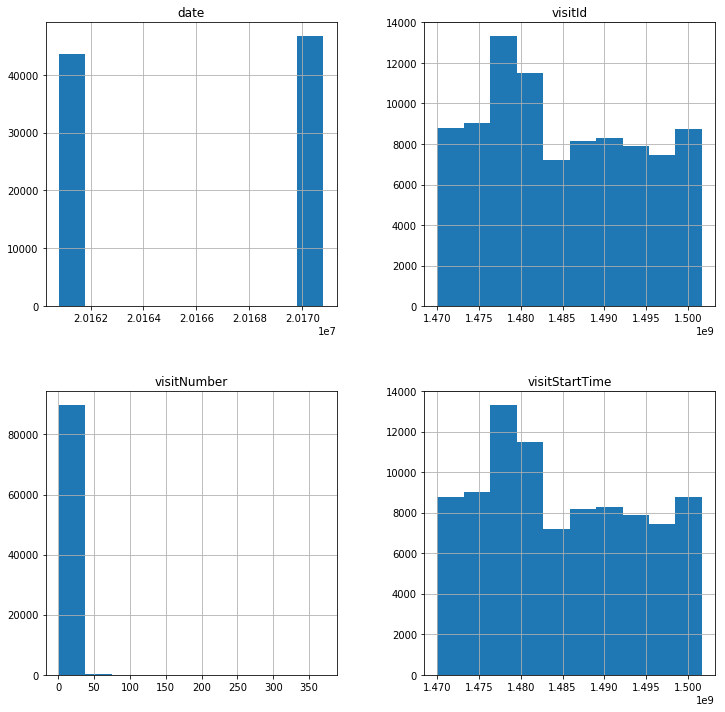

In [15]:
train_df.hist(figsize = (12, 12))
plt.show()

In [16]:
test_df = test_df.sample(frac=0.1, random_state = 1)
print(test_df.shape)
print(test_df.describe())

(8047, 24)
               date       visitId  visitNumber  visitStartTime
count  8.047000e+03  8.047000e+03  8047.000000    8.047000e+03
mean   2.017498e+07  1.513362e+09     2.494097    1.513362e+09
std    4.574676e+03  6.640862e+06     9.439720    6.640863e+06
min    2.017080e+07  1.501669e+09     1.000000    1.501669e+09
25%    2.017101e+07  1.507552e+09     1.000000    1.507552e+09
50%    2.017121e+07  1.513125e+09     1.000000    1.513125e+09
75%    2.018022e+07  1.519211e+09     2.000000    1.519211e+09
max    2.018043e+07  1.525157e+09   245.000000    1.525157e+09


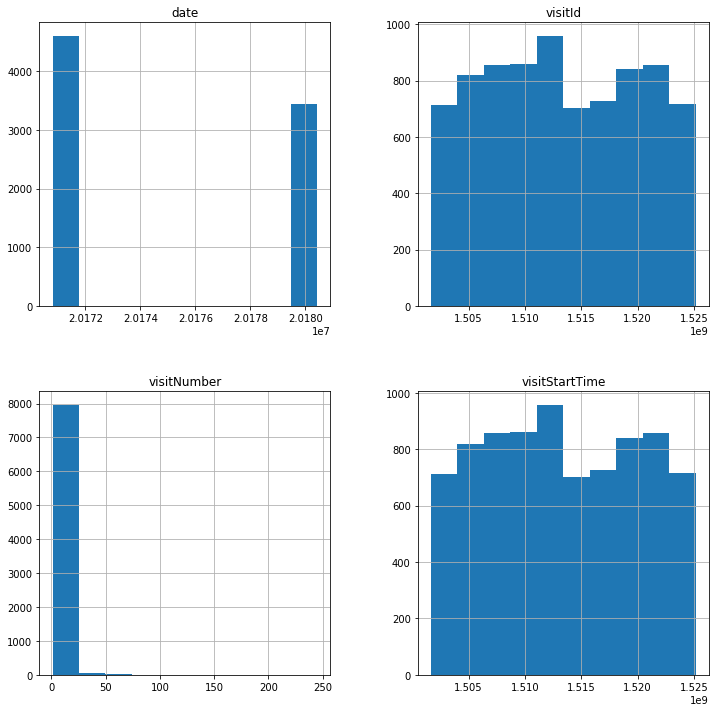

In [17]:
test_df.hist(figsize = (12, 12))
plt.show()